In [1]:
import pandas as pd
import numpy as np
import networkx as nx

#Visualizations
import matplotlib.pyplot as plt
# from nxviz import CircosPlot # Needs to be installed

In [2]:
S = nx.Graph()

In [3]:
# using 2010 data for graphing, smallest data set to build the prototype for using NetworkX faster

station_csv = pd.read_csv("/home/grimoire/Projects/NiceRide/Nice_Ride_data/2010/NiceRide_station_2010.csv")
ride_csv = pd.read_csv("/home/grimoire/Projects/NiceRide/Nice_Ride_data/2010/NiceRide_trip_history_2010.csv")

In [4]:
station_2010 = pd.DataFrame(station_csv)
rides_2010 = pd.DataFrame(ride_csv)

In [5]:
station_2010.head()

,Terminal,Station,Latitude,Longitude,Ndocks
0,30000,100 Main Street SE,44.984892,-93.256551,23
1,30001,25th Street & 33rd. Ave. S.,44.957340,-93.223740,15
2,30002,Augsburg College,44.966220,-93.238400,21
3,30003,Plymouth Ave N. & N. Oliver Ave,44.991412,-93.306569,23
4,30004,11th Street & Hennepin,44.975340,-93.278690,23


In [6]:
rides_2010.head()

,Start_date,Start_name,Start_id,End_date,End_name,End_id,duration,account
0,2010-06-10 17:38:00,100 Main Street SE,30000,2010-06-10 17:54:00,IDS Center,30042,964,Casual
1,2010-06-10 21:15:00,100 Main Street SE,30000,2010-06-10 21:27:00,11th Street & Hennepin,30004,717,Casual
2,2010-06-11 13:52:00,100 Main Street SE,30000,2010-06-11 14:42:00,Washington & 2nd Ave N,30021,2966,Casual
3,2010-06-11 15:20:00,100 Main Street SE,30000,2010-06-11 16:11:00,Blegen Hall,30019,3040,Casual
4,2010-06-11 15:21:00,100 Main Street SE,30000,2010-06-11 16:11:00,Blegen Hall,30019,3035,Casual


In [7]:
station_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
Terminal     65 non-null int64
Station      65 non-null object
Latitude     65 non-null float64
Longitude    65 non-null float64
Ndocks       65 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.6+ KB


In [8]:
rides_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99062 entries, 0 to 99061
Data columns (total 8 columns):
Start_date    99062 non-null object
Start_name    99062 non-null object
Start_id      99062 non-null int64
End_date      99062 non-null object
End_name      99062 non-null object
End_id        99062 non-null int64
duration      99062 non-null int64
account       99062 non-null object
dtypes: int64(3), object(5)
memory usage: 6.0+ MB


In [9]:
for i, d in station_2010.iterrows():
    
    S.add_node(d['Terminal'])
    # Add coordinates to the nodes
#    S[d['Terminal']]['Latitude']= d['Latitude']
#    S[d['Terminal']]['Longitude'] = d['Longitude']

In [10]:
rides_2010.keys()

Index(['Start_date', 'Start_name', 'Start_id', 'End_date', 'End_name',
       'End_id', 'duration', 'account'],
      dtype='object')

In [11]:
for i, d in rides_2010.iterrows() :
# Iterrows iterates over DataFrame rows as (index, Series) pairs
# i is the index of the row
# d is the data contained within that row

    if (d['Start_id'], d['End_id']) in S.edges():   # Check if edge already exists
                                                    # Update weight of that edge, and increase total ride duration
            
        S[d['Start_id']][d['End_id']]['weight'] += 1
        
    else :  # if an edge doesn't already exist
            # create and give it a weight = 1, include duration of ride
            
        S.add_edge(d['Start_id'], d['End_id'], weight = 1)

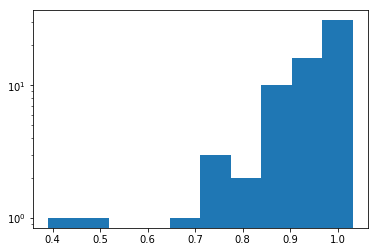

In [12]:
dcs = nx.degree_centrality(S)

# Plot the histogram of degree centrality values
# degree of centrality = ...

plt.hist(list(dcs.values()))
plt.yscale('log')  
plt.show() 

In [13]:
S.nodes(data = True)

NodeDataView({30000: {}, 30001: {}, 30002: {}, 30003: {}, 30004: {}, 30005: {}, 30006: {}, 30007: {}, 30008: {}, 30009: {}, 30010: {}, 30011: {}, 30012: {}, 30013: {}, 30014: {}, 30015: {}, 30016: {}, 30017: {}, 30018: {}, 30019: {}, 30020: {}, 30021: {}, 30022: {}, 30023: {}, 30024: {}, 30025: {}, 30026: {}, 30027: {}, 30028: {}, 30029: {}, 30030: {}, 30031: {}, 30032: {}, 30033: {}, 30034: {}, 30035: {}, 30036: {}, 30037: {}, 30038: {}, 30039: {}, 30040: {}, 30041: {}, 30042: {}, 30043: {}, 30044: {}, 30045: {}, 30046: {}, 30047: {}, 30048: {}, 30049: {}, 30050: {}, 30051: {}, 30052: {}, 30053: {}, 30054: {}, 30055: {}, 30056: {}, 30057: {}, 30058: {}, 30059: {}, 30060: {}, 30061: {}, 30062: {}, 30063: {}, 30064: {}})

In [14]:
max(S.edges(data = True))

(30064, 30064, {'weight': 39})

In [15]:
# S.edges(data = True)
'''
Can be sorted()
max() returns the highest tuple value of u,v not d (u,v, d)
min() returns the lowest tuple value of u,v not d (u,v, d)
'''

'\nCan be sorted()\nmax() returns the highest tuple value of u,v not d (u,v, d)\nmin() returns the lowest tuple value of u,v not d (u,v, d)\n'

In [16]:
print(S.number_of_nodes())
print(S.number_of_edges())

65
1930


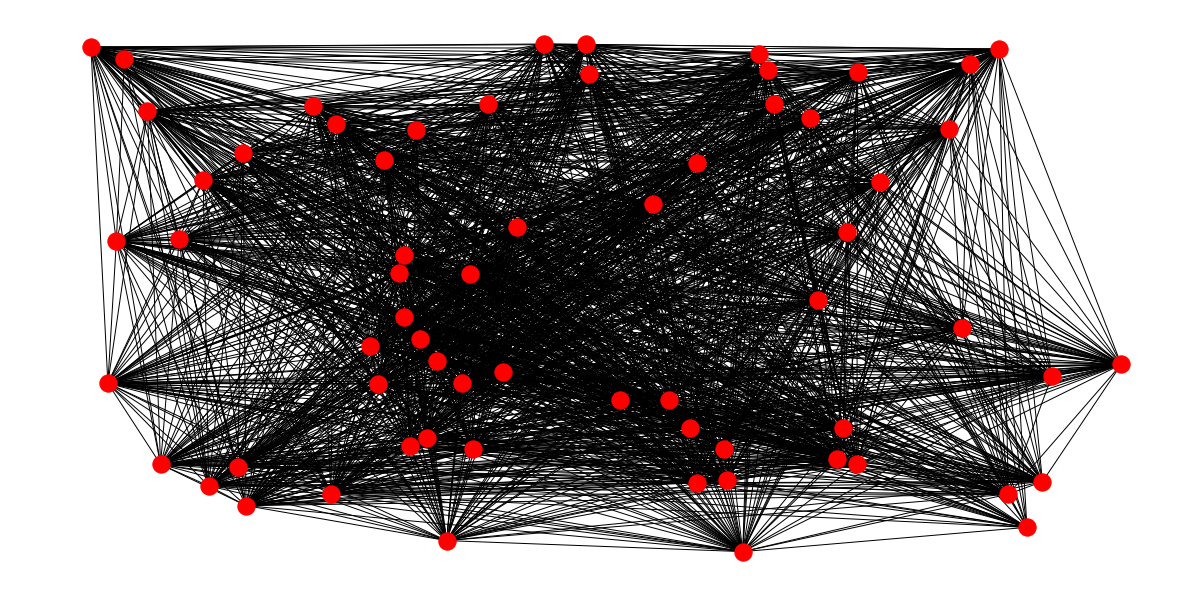

In [17]:
plt.figure(figsize=[16,8])
#plt.scatter(station_2010.Latitude, station_2010.Longitude)
nx.draw_random(S)
plt.show()

In [18]:
# S = nx.normalized_laplacian_matrix(S, weight='weight') # Does not normalize weights...